## Imorting required Packages

In [1]:
import cv2
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
from skimage import io

## <b style="color:blue">Belnding Two Images</b>

Suppose you have two images and you want to belnd them sp that features of both images are visible. We use registration techniques to blend one image over the the second one and determine whether there are any changes. Let's look at the code:

In [2]:
# Read Image 01
image_01 = cv2.imread('../input/puppy-image/puppy_01.jpg')
# Read image 02
image_02 = cv2.imread('../input/puppy-image/puppy_02.jpg')

In [3]:
# Define alpha and Beta
alpha = 0.30
beta = 0.70

In [4]:
# Blend images
blend_images = cv2.addWeighted(image_01, alpha, image_02, beta, 0.0)

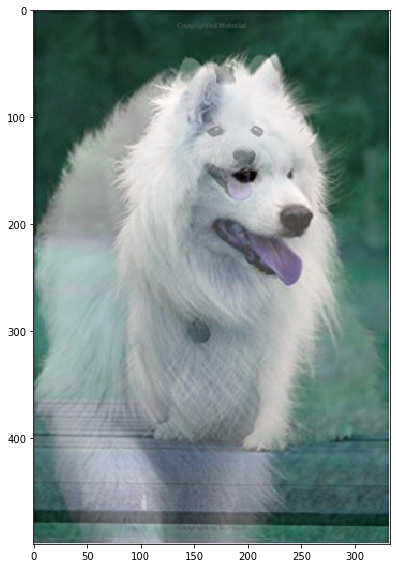

In [5]:
# Image show
plt.figure(figsize = (10, 8))
io.imshow(blend_images)

## <b style="color:blue">**import cv2:**</b>
The complete OpenCV library is present in the package cv2.

## <b style="color:blue"> **cv2.imread():** </b>
Similar to skimage.io.imread(), we have cv2.imread(), which is used to read the image from a particular destination.

## <b style="color:blue">**cv2.addWeighted():**</b>
This function blends the two images. The alpha and beta parameters indicate the transparency in both images. There are a few formulas that help to determine the final blending. The last parameter is called gamma. Currently it has a value of zero. It’s just a scalar, which is added to the formulas, to transform the images more effectively. In general, gamma is zero.

## Changing Contrast and Brightness:

To change contrast and brightness in an image, we should have an
understanding of what these two terms mean:
   * ## <b style="color:blue"> **Contrast:** </b>
        Contrast is the difference between maximum and minimum pixel intensity.
   * ## <b style="color:blue"> **Brightness:** </b>
        Brightness refers to the lightness or darkness of an image. To make an image brighter, we add a constant number to all the             pixels present in it.

Let’s look at the code and the output, to see the difference between
contrast and brightness.

In [6]:
image = cv2.imread('../input/puppy-image/puppy_01.jpg')

In [7]:
# Create a dummy image that stores different contrast and brightness
new_image = np.zeros(image.shape, image.dtype)

In [8]:
# Brightness and contrest parameters
contrast = 3.0
bright = 2

In [9]:
# Change the contrast and brightness
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        for z in range(image.shape[2]):
            new_image[x, y, z] = np.clip(contrast * image[x, y, z] + bright, 0, 255)

<Figure size 432x288 with 0 Axes>

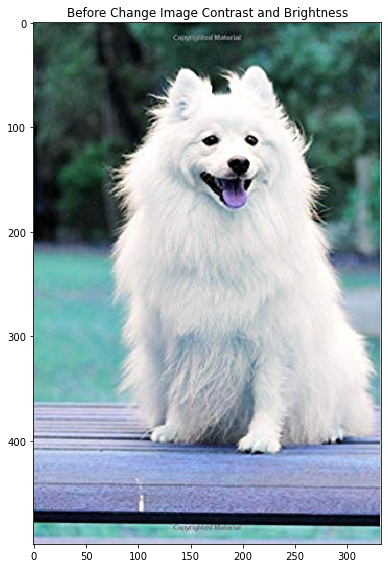

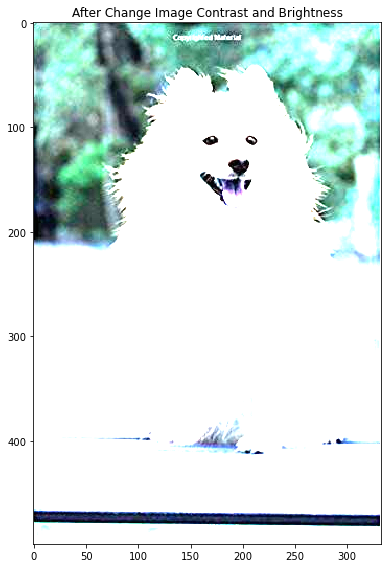

In [10]:
# Show First Image
figure(0)
plt.figure(figsize = (10, 8))
plt.title("Before Change Image Contrast and Brightness")
io.imshow(image)

# Show Second Image
figure(1)
plt.figure(figsize = (10, 8))
plt.title("After Change Image Contrast and Brightness")
io.imshow(new_image)

## Adding Text to Images
cv2.putText() is a function present in the cv2 module that allows us to
add text to images. The function takes following arguments:
* Image, where you want to write the text
* The text you want to write
* Position of the text on the image

In [11]:
# Define Font
font = cv2.FONT_HERSHEY_SIMPLEX

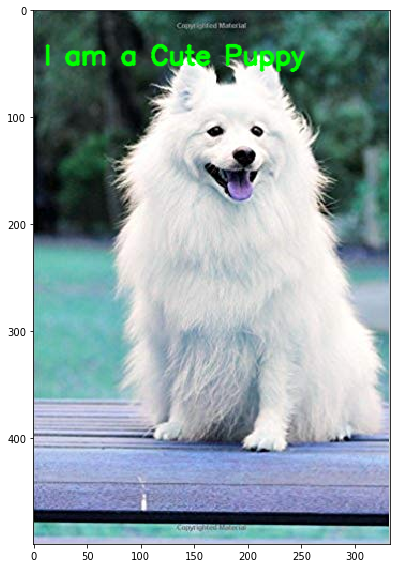

In [12]:
# Write on the image
plt.figure(figsize = (10, 8))
cv2.putText(image, "I am a Cute Puppy", (10, 50), font, 0.8, (0, 255, 0), 2, cv2.LINE_AA)
io.imshow(image)

## Smoothing Images
In this section we take a look at three filters used to smooth images. These
filters are as follows:
* The median filter (cv2.medianBlur)
* The gaussian filter (cv2.GaussianBlur)
* The bilateral filter (cv2.bilateralFilter)

In [13]:
#Read images for different blurring purposes
image_Original = cv2.imread("../input/puppy-image/puppy_01.jpg")
image_MedianBlur = cv2.imread("../input/puppy-image/puppy_01.jpg")
image_GaussianBlur = cv2.imread("../input/puppy-image/puppy_01.jpg")
image_BilateralBlur = cv2.imread("../input/puppy-image/puppy_01.jpg")

#Blur images
image_MedianBlur=cv2.medianBlur(image_MedianBlur,9)
image_GaussianBlur=cv2.GaussianBlur(image_GaussianBlur,(9,9),10)
image_BilateralBlur=cv2.bilateralFilter(image_BilateralBlur,9,100,75)

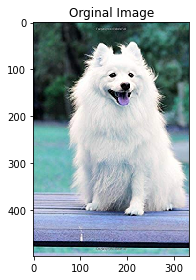

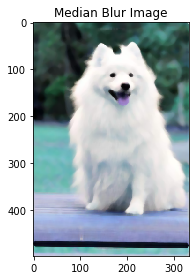

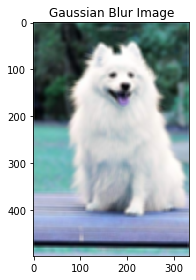

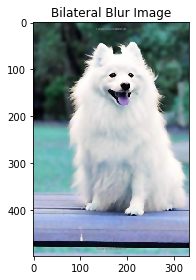

In [14]:
#Show images
figure(0)
plt.title("Orginal Image")
io.imshow(image_Original)

figure(1)
plt.title("Median Blur Image")
io.imshow(image_MedianBlur)

figure(2)
plt.title("Gaussian Blur Image")
io.imshow(image_GaussianBlur)

figure(3)
plt.title("Bilateral Blur Image")
io.imshow(image_BilateralBlur)

## Changing The Image Shape
In this section we examine erosion and dilation, which are the two
operations used to change the shape of images. Dilation results in the
addition of pixels to the boundary of an object; erosion leads to the
removal of pixels from the boundary.

In [15]:
#Read image
image = cv2.imread("../input/puppy-image/puppy_01.jpg")
#Define erosion size
s1 = 0
s2 = 10
s3 = 10

In [16]:
#Define erosion type
t1 = cv2.MORPH_RECT
t2 = cv2.MORPH_CROSS
t3 = cv2.MORPH_ELLIPSE
#Define and save the erosion template
tmp1 = cv2.getStructuringElement(t1, (2*s1 + 1, 2*s1+1), (s1, s1))
tmp2= cv2.getStructuringElement(t2, (2*s2 + 1, 2*s2+1), (s2, s2))
tmp3 = cv2.getStructuringElement(t3, (2*s3 + 1, 2*s3+1), (s3, s3))
#Apply the erosion template to the image and save in different variables
final1 = cv2.erode(image, tmp1)
final2 = cv2.erode(image, tmp2)
final3 = cv2.erode(image, tmp3)

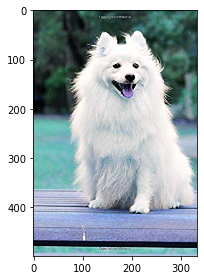

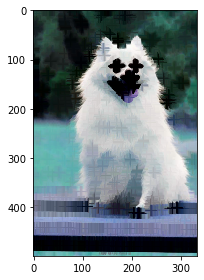

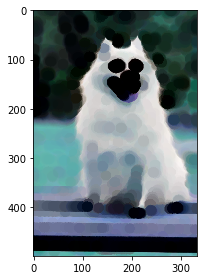

In [17]:
#Show all the images with different erosions
figure(0)
io.imshow(final1)
figure(1)
io.imshow(final2)
figure(2)
io.imshow(final3)

In [18]:
#Define dilation size
d1 = 0
d2 = 10
d3 = 20
#Define dilation type
t1 = cv2.MORPH_RECT
t2 = cv2.MORPH_CROSS
t3 = cv2.MORPH_ELLIPSE
#Store the dilation templates
tmp1 = cv2.getStructuringElement(t1, (2*d1 + 1, 2*d1+1), (d1, d1))
tmp2 = cv2.getStructuringElement(t2, (2*d2 + 1, 2*d2+1), (d2, d2))
tmp3 = cv2.getStructuringElement(t3, (2*d3 + 1, 2*d3+1), (d3, d3))
#Apply dilation to the images
final1 = cv2.dilate(image, tmp1)
final2 = cv2.dilate(image, tmp2)
final3 = cv2.dilate(image, tmp3)

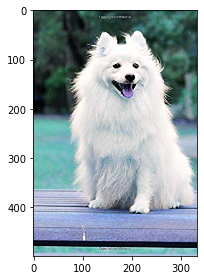

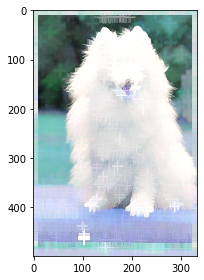

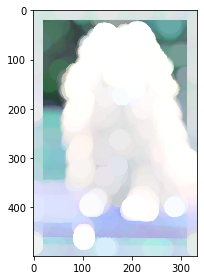

In [19]:
#Show the images
figure(0)
io.imshow(final1)
figure(1)
io.imshow(final2)
figure(2)
io.imshow(final3)

## Effecting Image Threshold
The main reason you would do image thresholding is to segment images.
We try to get an object out of the image by removing the background and
by focusing on the object. To do this, we first convert the image to grayscale
and then into a binary format—meaning, the image contains black or
white only.

In [20]:
#Define threshold types
"""
0 - Binary
1 - Binary Inverted
2 - Truncated
3 - Threshold To Zero
4 - Threshold To Zero Inverted
"""

'\n0 - Binary\n1 - Binary Inverted\n2 - Truncated\n3 - Threshold To Zero\n4 - Threshold To Zero Inverted\n'

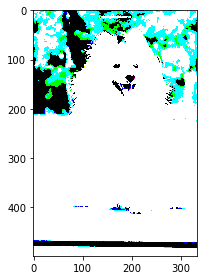

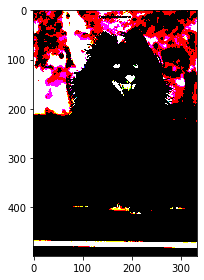

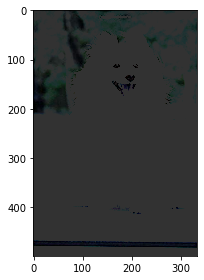

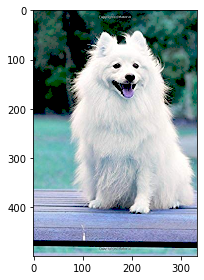

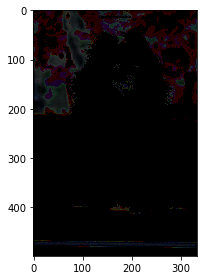

In [21]:
#Apply different thresholds and save in different variables
_, img1 = cv2.threshold(image, 50, 255, 0 )
_, img2 = cv2.threshold(image, 50, 255, 1 )
_, img3 = cv2.threshold(image, 50, 255, 2 )
_, img4 = cv2.threshold(image, 50, 255, 3 )
_, img5 = cv2.threshold(image, 50, 255, 4 )

#Show the different threshold images
figure(0)
io.imshow(img1) #Prints Binary Image
figure(1)
io.imshow(img2) #Prints Binary Inverted Image
figure(2)
io.imshow(img3) #Prints Truncated Image
figure(3)
io.imshow(img4) #Prints Threshold to Zero Image
figure(4)
io.imshow(img5) #Prints Threshold to Zero Inverted Image

## Calculating Image Gradients
In this section we look at edge detection using Sobel derivatives. Edges are
found in two directions: the vertical direction and the horizontal direction.
With this algorithm, we emphasize only those regions that have very high
spatial frequency, which may correspond to edges. Spatial frequency is the
level of detail present in an area of importance.

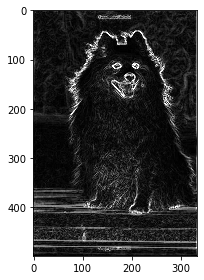

In [22]:
#Apply gaussian blur
cv2.GaussianBlur(image, (3, 3), 0)
#Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#Apply Sobel method to the grayscale image
grad_x = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3, scale=1,
delta=0, borderType=cv2.BORDER_DEFAULT) #Horizontal Sobel Derivation
grad_y = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=3, scale=1,
delta=0, borderType=cv2.BORDER_DEFAULT) #Vertical Sobel Derivation
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
#Apply both
#Show the image
io.imshow(grad)#View the image

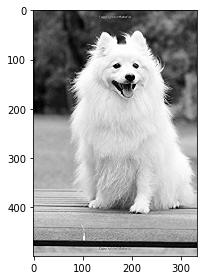

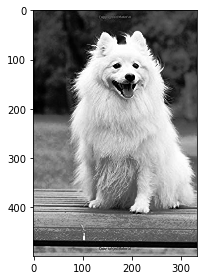

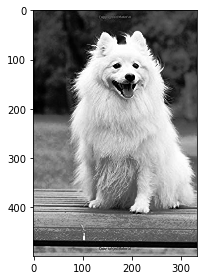

In [23]:
#Convert to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#Apply equalize histogram
image_eqlzd = cv2.equalizeHist(image) #Performs Histogram Equalization
#Show both images
figure(0)
io.imshow(image)
figure(1)
io.imshow(image_eqlzd)
figure(2)
io.imshow(image_eqlzd)